In [2]:
%load_ext autoreload
%autoreload 2

# ANN Model

I will be building, training and testing an ANN model against the cleaned data.

Target: loan_status

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('white')

# Split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
loan = pd.read_csv('data/loan.csv')

In [6]:
loan['loan_status']

0         1
1         1
2         1
3         1
4         0
         ..
395214    1
395215    1
395216    1
395217    1
395218    1
Name: loan_status, Length: 395219, dtype: int64

In [7]:
X = loan.drop('loan_status', axis=1)
y = loan['loan_status']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
y_train.head()

268088    1
164121    1
270915    1
179987    1
304961    1
Name: loan_status, dtype: int64

In [10]:
X_train.head()

,Unnamed: 0,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,zip,earliest_cr_line_y,earliest_cr_line_m,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,...,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
268088,268644,35000.0,21.98,1336.31,87500.0,10.72,13.0,0.0,22866.0,87.3,27.0,0.0,0.0,29597,2000,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
164121,164453,10000.0,6.62,307.04,61000.0,16.03,5.0,0.0,2773.0,73.0,7.0,2.0,0.0,48052,1996,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
270915,271474,34000.0,7.90,1063.87,90000.0,15.14,6.0,0.0,14318.0,50.1,15.0,0.0,0.0,70466,2003,12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
179987,180350,21000.0,13.33,710.92,52000.0,11.12,6.0,0.0,6554.0,83.0,30.0,3.0,0.0,70466,1999,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
304961,305594,20000.0,15.61,699.30,65000.0,17.08,6.0,1.0,8406.0,74.4,12.0,0.0,0.0,30723,2007,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train)

MinMaxScaler()

In [14]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Early Stopping

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [16]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# Build 01 - 1 Hidden Layer

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [18]:
X_train.shape

(296414, 164)

In [18]:
model = Sequential()

# input layer
model.add(Dense(164, activation='relu'))

# hidden layer
model.add(Dense(83, activation='relu'))

# hidden layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam')

## Large Batch Size

In [19]:
model.fit(x=X_train,
          y=y_train,
          epochs=300,
          batch_size=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/300


2023-03-02 16:20:54.350068: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1483/1483 [==============================] - 2s 1ms/step - loss: 0.3969 - val_loss: 0.3633
Epoch 2/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.3574 - val_loss: 0.3547
Epoch 3/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.3222 - val_loss: 0.2878
Epoch 4/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.2770 - val_loss: 0.2772
Epoch 5/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.2707 - val_loss: 0.2734
Epoch 6/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.2684 - val_loss: 0.2731
Epoch 7/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.2659 - val_loss: 0.2730
Epoch 8/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.2641 - val_loss: 0.2770
Epoch 9/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.2624 - val_loss: 0.2760
Epoch 10/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.2603 

<Axes: >

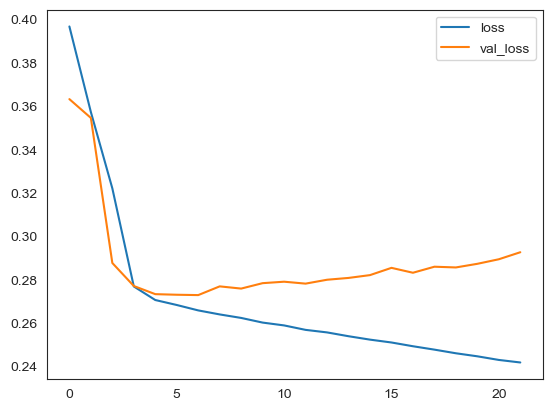

In [20]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Small batch size

In [21]:
model.fit(x=X_train,
          y=y_train,
          epochs=300,
          batch_size=32,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/300
9263/9263 [==============================] - 7s 802us/step - loss: 0.2613 - val_loss: 0.2889
Epoch 2/300
9263/9263 [==============================] - 7s 796us/step - loss: 0.2568 - val_loss: 0.2814
Epoch 3/300
9263/9263 [==============================] - 7s 798us/step - loss: 0.2547 - val_loss: 0.2899
Epoch 4/300
9263/9263 [==============================] - 7s 796us/step - loss: 0.2532 - val_loss: 0.2901
Epoch 5/300
9263/9263 [==============================] - 7s 800us/step - loss: 0.2515 - val_loss: 0.2880
Epoch 6/300
9263/9263 [==============================] - 7s 798us/step - loss: 0.2488 - val_loss: 0.2937
Epoch 7/300
9263/9263 [==============================] - 8s 874us/step - loss: 0.2471 - val_loss: 0.2921
Epoch 8/300
9263/9263 [==============================] - 8s 852us/step - loss: 0.2452 - val_loss: 0.2945
Epoch 9/300
9263/9263 [==============================] - 8s 812us/step - loss: 0.2434 - val_loss: 0.2964
Epoch 10/300
9263/9263 [==============================]

<Axes: >

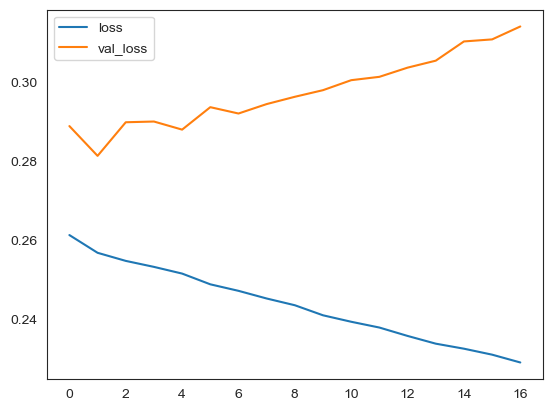

# Build 02 - 2 Hidden Layers

In [28]:
model = Sequential()

# input layer
model.add(Dense(164, activation='relu'))

# hidden layer
model.add(Dense(83, activation='relu'))

# hidden layer
model.add(Dense(20, activation='relu'))

# hidden layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam')

In [29]:
model.fit(x=X_train,
          y=y_train,
          epochs=300,
          batch_size=32,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/300
9263/9263 [==============================] - 8s 846us/step - loss: 0.3558 - val_loss: 0.2888
Epoch 2/300
9263/9263 [==============================] - 8s 833us/step - loss: 0.2833 - val_loss: 0.2766
Epoch 3/300
9263/9263 [==============================] - 8s 851us/step - loss: 0.2766 - val_loss: 0.2721
Epoch 4/300
9263/9263 [==============================] - 8s 852us/step - loss: 0.2737 - val_loss: 0.2772
Epoch 5/300
9263/9263 [==============================] - 8s 873us/step - loss: 0.2713 - val_loss: 0.2731
Epoch 6/300
9263/9263 [==============================] - 8s 861us/step - loss: 0.2686 - val_loss: 0.2723
Epoch 7/300
9263/9263 [==============================] - 8s 836us/step - loss: 0.2661 - val_loss: 0.2739
Epoch 8/300
9263/9263 [==============================] - 8s 848us/step - loss: 0.2637 - val_loss: 0.2747
Epoch 9/300
9263/9263 [==============================] - 8s 845us/step - loss: 0.2613 - val_loss: 0.2765
Epoch 10/300
9263/9263 [==============================]

<Axes: >

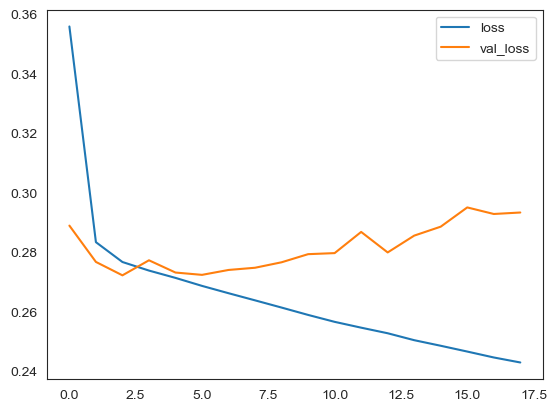

In [31]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Adding DropOut()

In [33]:
model = Sequential()

# input layer
model.add(Dense(164, activation='relu'))
model.add(Dropout(0.8))

# hidden layer
model.add(Dense(83, activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam')

In [34]:
model.fit(x=X_train,
          y=y_train,
          epochs=300,
          batch_size=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/300
1483/1483 [==============================] - 2s 2ms/step - loss: 0.4476 - val_loss: 0.4085
Epoch 2/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.4069 - val_loss: 0.3729
Epoch 3/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.3881 - val_loss: 0.3662
Epoch 4/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.3803 - val_loss: 0.3613
Epoch 5/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.3774 - val_loss: 0.3594
Epoch 6/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.3752 - val_loss: 0.3592
Epoch 7/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.3738 - val_loss: 0.3590
Epoch 8/300
1483/1483 [==============================] - 2s 2ms/step - loss: 0.3736 - val_loss: 0.3607
Epoch 9/300
1483/1483 [==============================] - 2s 1ms/step - loss: 0.3727 - val_loss: 0.3571
Epoch 10/300
1483/1483 [==============================] - 2s 1ms/step - l

# 0.2 Dropout

In [39]:
model = Sequential()

# input layer
model.add(Dense(164, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(83, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam')

In [40]:
model.fit(x=X_train,
          y=y_train,
          epochs=300,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.4035 - val_loss: 0.3596
Epoch 2/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3672 - val_loss: 0.3571
Epoch 3/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3605 - val_loss: 0.3531
Epoch 4/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3555 - val_loss: 0.3448
Epoch 5/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3419 - val_loss: 0.3096
Epoch 6/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3011 - val_loss: 0.2778
Epoch 7/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2834 - val_loss: 0.2773
Epoch 8/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2778 - val_loss: 0.2748
Epoch 9/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2755 - val_loss: 0.2748
Epoch 10/300
1158/1158 [==============================] - 2s 2ms/step - l

<Axes: >

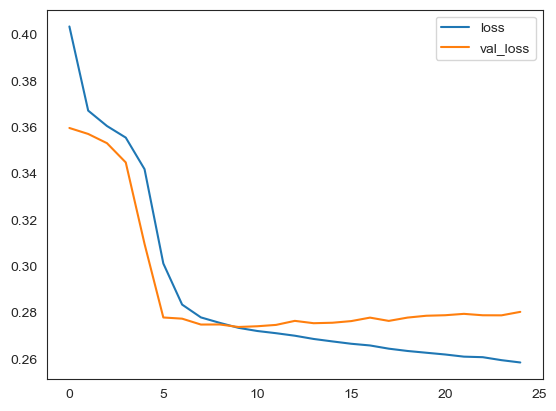

In [41]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# 0.5 Dropout

In [20]:
model = Sequential()

# input layer
model.add(Dense(164, activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(83, activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer='adam')

In [22]:
log_directory = 'logs/fit'

board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

2023-03-02 17:16:21.525781: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2023-03-02 17:16:21.525797: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2023-03-02 17:16:21.526145: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.


In [23]:
model.fit(x=X_train,
          y=y_train,
          epochs=300,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop, board]
          )

Epoch 1/300


2023-03-02 17:16:36.301894: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 105/1158 [=>............................] - ETA: 1s - loss: 0.5315

2023-03-02 17:16:36.683909: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2023-03-02 17:16:36.683919: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2023-03-02 17:16:36.686056: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2023-03-02 17:16:36.686650: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.
2023-03-02 17:16:36.688986: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/plugins/profile/2023_03_02_17_16_36

2023-03-02 17:16:36.690533: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/plugins/profile/2023_03_02_17_16_36/Yinings-MBP.trace.json.gz
2023-03-02 17:16:36.691755: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/plugins/profile/2023_03_02_17_16_36

2023-03-02 17:16:36.692082: I tensorf

1158/1158 [==============================] - 2s 2ms/step - loss: 0.4436 - val_loss: 0.3841
Epoch 2/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3894 - val_loss: 0.3588
Epoch 3/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3712 - val_loss: 0.3565
Epoch 4/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3666 - val_loss: 0.3553
Epoch 5/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3634 - val_loss: 0.3553
Epoch 6/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3614 - val_loss: 0.3494
Epoch 7/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3528 - val_loss: 0.3328
Epoch 8/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3423 - val_loss: 0.3104
Epoch 9/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3201 - val_loss: 0.2897
Epoch 10/300
1158/1158 [==============================] - 2s 2ms/step - loss: 0.3069 

<Axes: >

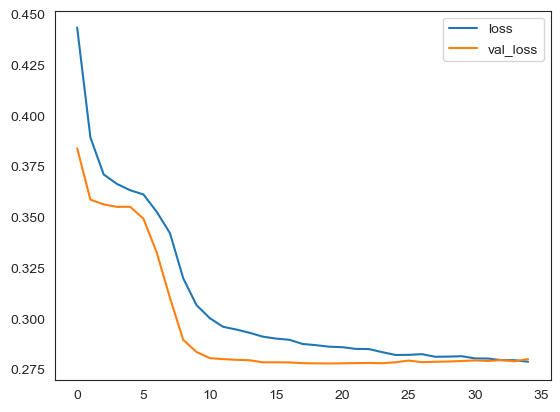

In [24]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [25]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

3088/3088 [==============================] - 1s 311us/step


# Performance Evaluation

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     19230
           1       0.88      1.00      0.93     79575

    accuracy                           0.89     98805
   macro avg       0.93      0.71      0.77     98805
weighted avg       0.90      0.89      0.87     98805



# Saving Model

In [60]:
from tensorflow.keras.models import load_model

In [61]:
model.save('model.h5')